In [ ]:
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Dissertação Caio

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Dissertação Caio


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

n_train = 25
n_parts = 10
np.random.seed(42)
all_idxs = list(5*np.random.permutation(list(range(38))) + 95)
all_idxs.remove(190)
train_idxs = all_idxs[:25]

plt.rcParams['font.size'] = 14

plt.rcParams['font.family'] = 'serif'


In [38]:
def analyze_dominant_frequencies(T, Y, train_idxs, min_freq=0.5, max_freq=50):
    n_experiments = Y.shape[0]
    dominant_freqs = []
    all_spectra = []
    detailed_results = {}
    plt.figure(figsize=(10, 6))

    for exp_idx in range(n_experiments):
        t = T[exp_idx, :]
        y = Y[exp_idx, :]
        dt = t[1] - t[0]
        fs = 1/dt

        if max_freq > fs/2:
            max_freq = fs/2 * 0.9  # Evita a frequência de Nyquist
            print(f"Aviso: max_freq ajustada para {max_freq:.2f} Hz (metade da frequência de amostragem)")

        N = len(y)
        yf = fft(y)
        xf = fftfreq(N, dt)[:N//2]
        spectrum = 2.0/N * np.abs(yf[0:N//2])
        all_spectra.append(spectrum)
        valid_freqs = (xf >= min_freq) & (xf <= max_freq)
        xf_filtered = xf[valid_freqs]
        spectrum_filtered = spectrum[valid_freqs]
        peaks, _ = find_peaks(spectrum_filtered, height=0.2*np.max(spectrum_filtered))

        if len(peaks) > 0:
            dominant_idx = peaks[np.argmax(spectrum_filtered[peaks])]
            dominant_freq = xf_filtered[dominant_idx]
        else:
            dominant_freq = np.nan
            print(f"Aviso: Nenhum pico encontrado para o experimento {train_idxs[exp_idx]} na faixa {min_freq}-{max_freq}Hz")

        dominant_freqs.append(dominant_freq)
        detailed_results[train_idxs[exp_idx]] = {
            'dominant_freq': dominant_freq,
            'spectrum_x': xf,
            'spectrum_y': spectrum,
            'fs': fs
        }

        plt.plot(xf, spectrum, alpha=0.3)

    mean_spectrum = np.mean(np.array(all_spectra), axis=0)
    plt.plot(xf, mean_spectrum, 'k-', linewidth=2, label='Espectro Médio')

    plt.xlabel('Frequência')
    plt.ylabel('Amplitude')
    plt.xlim([0, max_freq*1.1])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    valid_freqs = [f for f in dominant_freqs if not np.isnan(f)]

    if len(valid_freqs) == 0:
        raise ValueError("Nenhuma frequência dominante válida foi encontrada na faixa especificada")

    mean_freq = np.mean(valid_freqs)
    plt.figure(figsize=(10, 5))
    plt.hist(valid_freqs, bins=20, alpha=0.7, edgecolor='black')
    plt.axvline(mean_freq, color='r', linestyle='--',
                label=f'Frequência média: {mean_freq:.2f}')
    plt.xlabel('Frequência Dominante')
    plt.ylabel('Número de Experimentos')
    plt.legend()
    plt.grid(True)
    plt.show()

    valid_mask = (xf >= min_freq) & (xf <= max_freq)
    dominant_idx_mean = np.argmax(mean_spectrum[valid_mask])
    dominant_freq_mean = xf[valid_mask][dominant_idx_mean]

    print("\n=== Resultados Sumarizados ===")
    print(f"Faixa de análise: {min_freq}-{max_freq} Hz")
    print(f"Frequência dominante média: {mean_freq:.2f} Hz")
    print(f"Frequência dominante do espectro médio: {dominant_freq_mean:.2f}")
    print(f"Desvio padrão: {np.std(valid_freqs):.2f} Hz")

    return mean_freq, detailed_results, mean_spectrum

In [39]:
proc_data_path = './dados/dados processados/treino/'

U = np.load(proc_data_path + 'U.npy')
T = np.load(proc_data_path + 'T.npy')
Y = np.load(proc_data_path + 'Y.npy')
Y_pd = np.load(proc_data_path + 'Y_pd.npy')
Y_sd = np.load(proc_data_path + 'Y_sd.npy')
Y_filtered = np.load(proc_data_path + 'Y_filtered.npy')
Y_pd_filtered = np.load(proc_data_path + 'Y_pd_filtered.npy')
Y_sd_filtered = np.load(proc_data_path + 'Y_sd_filtered.npy')



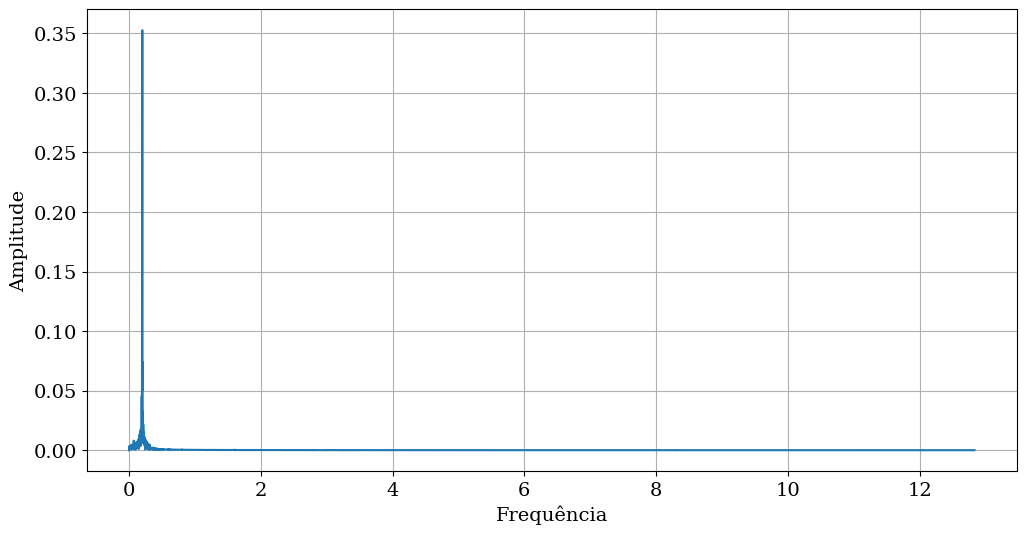

In [40]:
exp_idx = 0

t = T[exp_idx, :]
y = Y[exp_idx, :]
dt = t[1] - t[0]

N = len(y)

yf = fft(y)
xf = fftfreq(N, dt)[:N//2]

plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

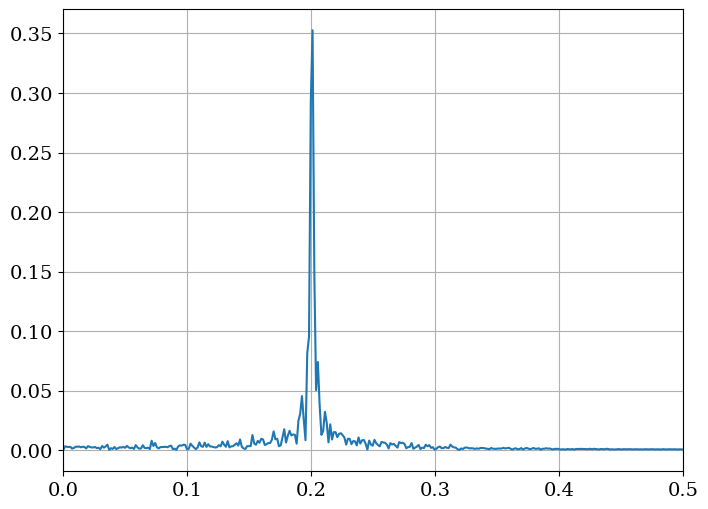

In [41]:
exp_idx = 0

t = T[exp_idx, :]
y = Y[exp_idx, :]
dt = t[1] - t[0]

N = len(y)

yf = fft(y)
xf = fftfreq(N, dt)[:N//2]

plt.figure(figsize=(8, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#plt.xlabel('Frequência')
#plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, .5)
plt.show()

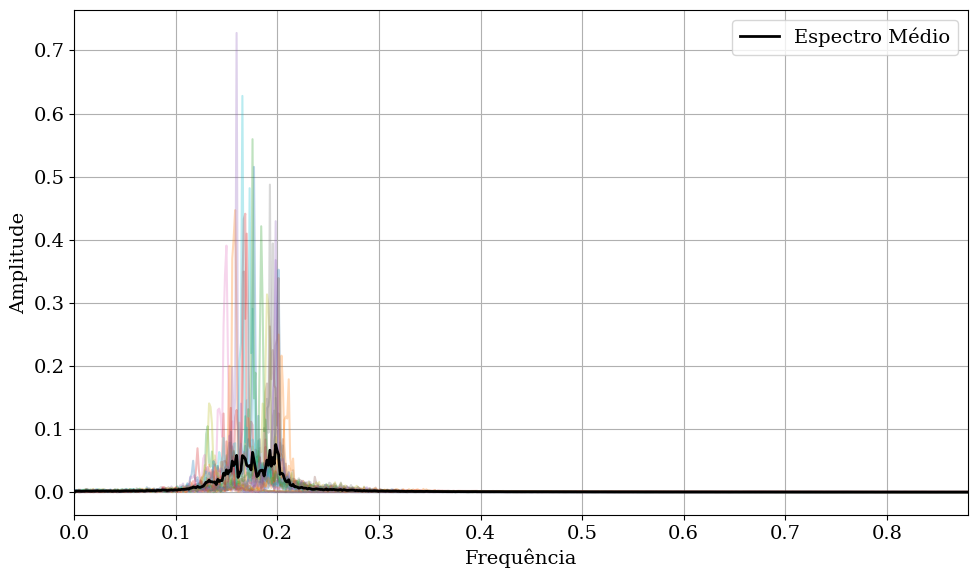

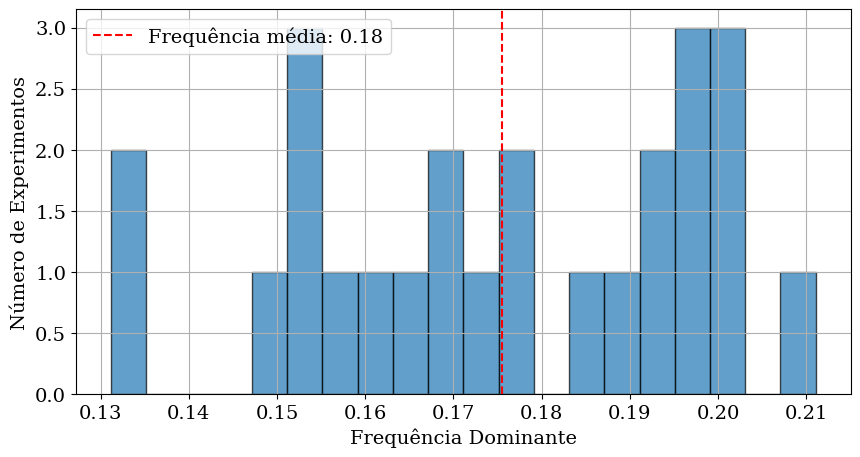


=== Resultados Sumarizados ===
Faixa de análise: 0-0.8 Hz
Frequência dominante média: 0.18 Hz
Frequência dominante do espectro médio: 0.20
Desvio padrão: 0.02 Hz


In [42]:
min_frequency = 0 # Frequência mínima de interesse (Hz)
max_frequency = 0.8  # Frequência máxima de interesse (Hz)

mean_freq, detailed_results, mean_spectrum = analyze_dominant_frequencies(
    T, Y, train_idxs, min_freq=min_frequency, max_freq=max_frequency)



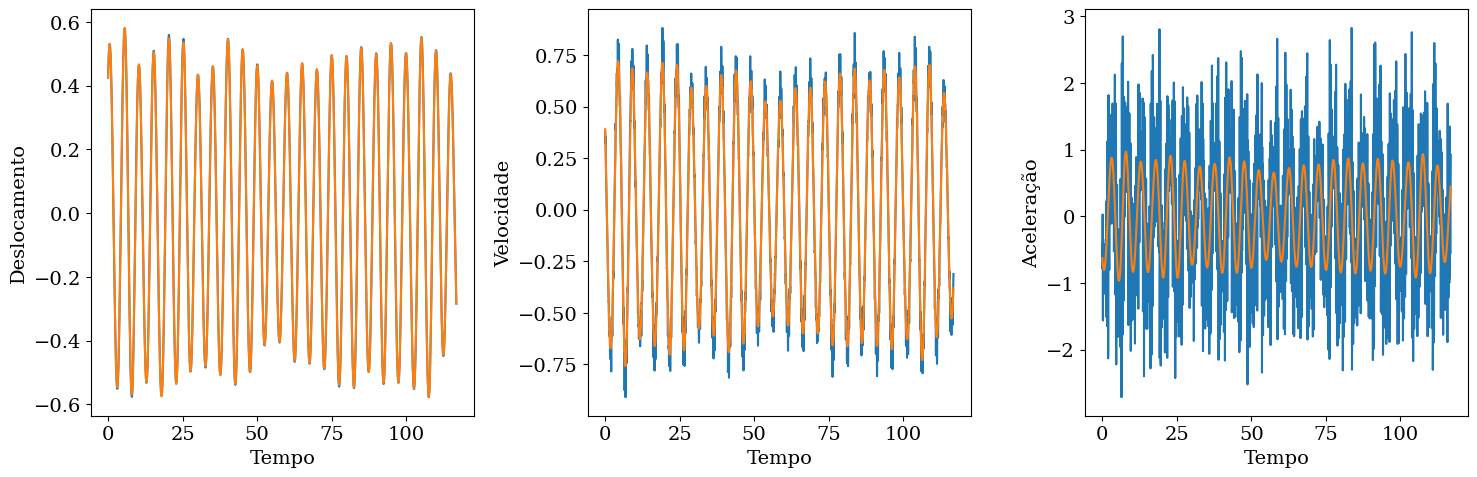

In [ ]:
exp_idx = 0

plot_indices = [0, 1, 2]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in plot_indices:
    if i == 0:
        axes[i].plot(t[:3000], Y[exp_idx, 5000:8000])
        axes[i].plot(t[:3000], Y_filtered[exp_idx, 5000:8000])
        axes[i].set_ylabel('Deslocamento')
        axes[i].set_xlabel('Tempo')
    elif i == 1:
        axes[i].plot(t[:3000], Y_pd[exp_idx, 5000:8000])
        axes[i].plot(t[:3000], Y_pd_filtered[exp_idx, 5000:8000])
        axes[i].set_ylabel('Velocidade')
        axes[i].set_xlabel('Tempo')
    else:
        axes[i].plot(t[:3000], Y_sd[exp_idx, 5000:8000])
        axes[i].plot(t[:3000], Y_sd_filtered[exp_idx, 5000:8000])
        axes[i].set_ylabel('Aceleração')
        axes[i].set_xlabel('Tempo')

plt.tight_layout()
plt.show()